In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('archive/train.csv')

In [3]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [4]:
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [5]:
counts=df['target'].value_counts()
print(counts)
print('Proportion:',round(counts[0]/counts[1],2),':1')

0    573518
1     21694
Name: target, dtype: int64
Proportion: 26.44 :1


<AxesSubplot:xlabel='target', ylabel='count'>

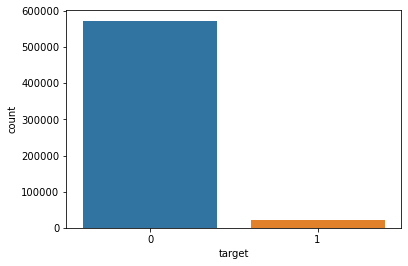

In [6]:
sns.countplot(df['target'])

### The Metric Trap

In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
X = df.iloc[:,2:]
y = df['target']

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=33, test_size=0.2)

model= XGBClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:',accuracy*100)

Accuracy: 96.37609939265643


### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion matrix:
 [[114726     12]
 [  4302      3]]


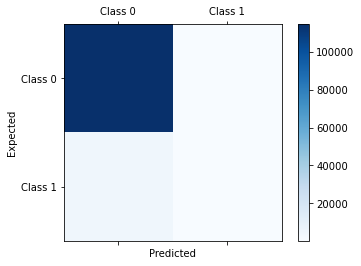

In [10]:
conf_mat = confusion_matrix(y_pred=y_pred,y_true=y_test)
print('confusion matrix:\n',conf_mat)

labels = ['Class 0','Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# 1. Resampling

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [11]:
#class count
count_class_0, count_class_1 = df.target.value_counts()

#divide data by classes
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

#### Random Under-sampling

Random under-sampling
0    21694
1    21694
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

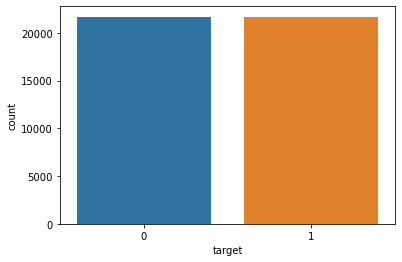

In [12]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random under-sampling')
print(df_test_under.target.value_counts())
sns.countplot(df_test_under['target'])

#### Random over-sampling

Random over-sampling
1    573518
0    573518
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

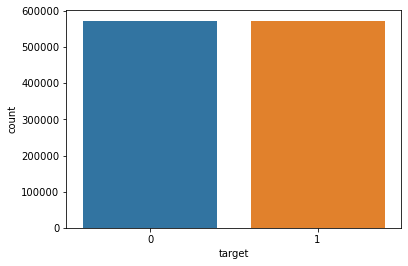

In [13]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_1_over,df_class_0],axis=0)

print('Random over-sampling')
print(df_test_over.target.value_counts())
sns.countplot(df_test_over['target'])

# 2.Python Imbalance - learn module

In [14]:
import imblearn

for ease of visualization lets create small dataset using make_classification method:

<AxesSubplot:title={'center':'Target Counts'}>

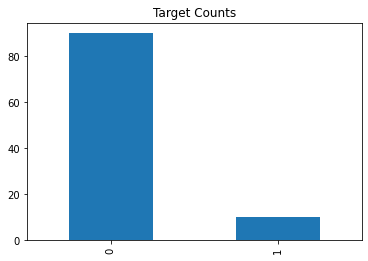

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=1.5, weights=[0.9,0.1], n_informative=3, n_redundant=1,
                          flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=100, random_state=10)

df_new=pd.DataFrame(X)
df_new['target']=y
df_new.target.value_counts().plot(kind='bar',title='Target Counts')

In [16]:
#plot_2d_space to see the data distribution

def plot_2d_space(X, y, label='Classes'):
    colors=['#1F77B4','#FF7F0E']
    markers=['o','s']
    
    for l,c,m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m)
        
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

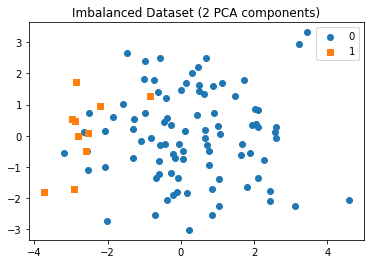

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced Dataset (2 PCA components)')

#### Random under-sampling and over-sampling with Imbalance learn

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

TypeError: __init__() got an unexpected keyword argument 'return_indices'

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

AttributeError: 'RandomOverSampler' object has no attribute 'fit_sample'

#### Under-Sampling : Tomek link

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [22]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

TypeError: __init__() got an unexpected keyword argument 'return_indices'

#### Under-sampling: cluster centroids

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In [23]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

TypeError: __init__() got an unexpected keyword argument 'ratio'

#### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

TypeError: __init__() got an unexpected keyword argument 'ratio'

#### Over-sampling followed by under-sampling

combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [25]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [ ]:
#end